# <font color=black> Analysis - ICA vs iCAP in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different methods and datasets.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script
- Innovation-driven CoActivation Pattern analysis – called `icap` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script

**ANALYSES:**
- _**Qualitative:**_ matching & visualization of one or two set(s) of components
- _**Quantitative:**_
    * Analysis of spatial similarity (for a single K, or across multiple Ks)
    * Distribution across axial subdvisions (D,V,L,R) for different Ks

In [1]:
import sys,json

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from plotting import Plotting
from spine_only_analysis import SpineOnlyAnalysis

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Initialization

### Load configuration file 

In [2]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_NK.json') as config_file:
    config = json.load(config_file)

# Qualitative evaluation

### Create instance of class

In [3]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_1 = {'k':40, 'dataset':'mtl', 'analysis':'ica'}
params_qual_2 = {'k':40, 'dataset':'mtl', 'analysis':'icap'}

plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=params_qual_2)

### Visualizing components
_Note: the component numbers refer to the ones of the original datasets (i.e., before any type of reordering)_

COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


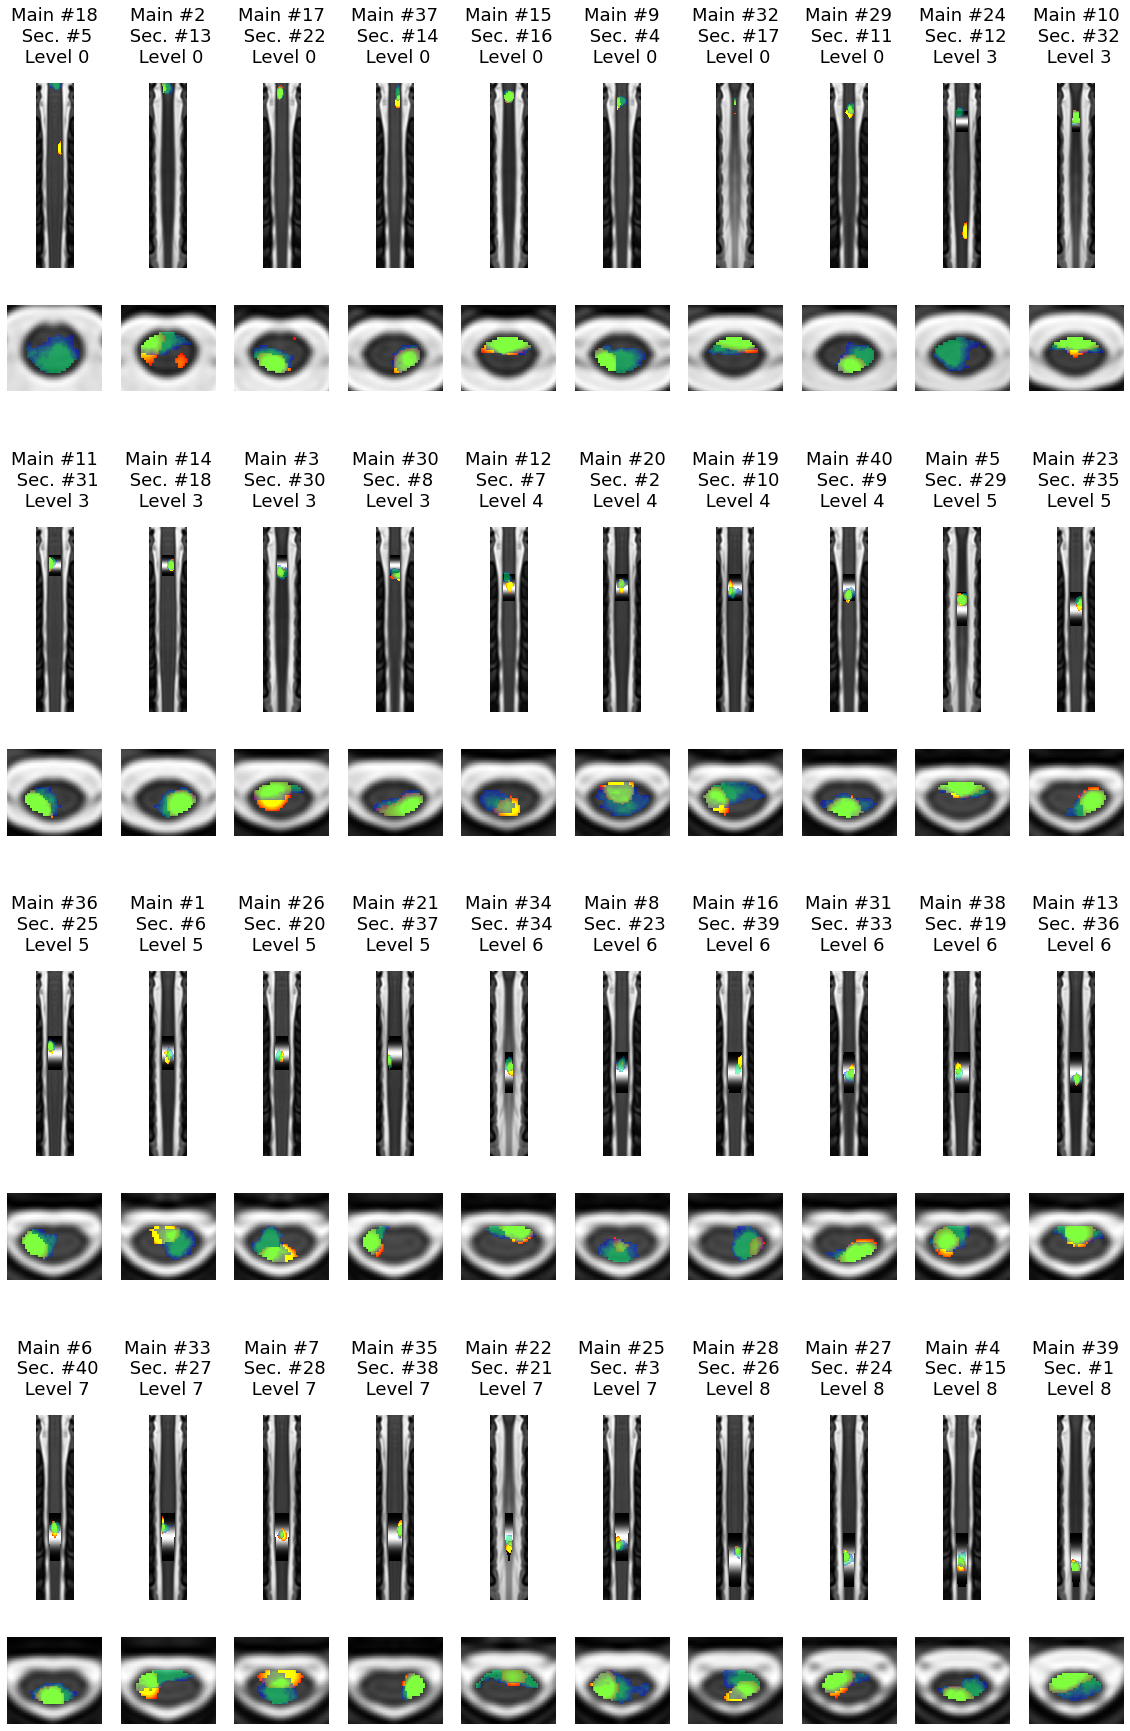

In [4]:
plotting.sc_plot(show_spinal_levels=True, k_per_line=10, lthresh=2.5, uthresh=5, save_results=False)

# Quantitative analyses

### <font color=red> WARNING: FOR NOW, ZTHRESHOLD ARE HARDCODED -> TO BE CHANGED </font>

## Within-dataset comparison

### `GVA` dataset

### Instantiate class
Note: the idea is to load all the possible K only once when instantiating the class

In [5]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_gva_1 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'ica'}
params_quant_gva_2 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'icap'}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

### Analyze spatial similarity
**Spatial similarity can be explored in two different ways:**
1. To obtain a similarity matrix for a particular K per condition
> In that case, pass `k1` (and `k2`if different) as arguments <br>
2. To look at the evolution of the mean similarity across different Ks
> In that case, pass `k_range` as argument

#### Matching is not great for low K, but good otherwise

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 4 vs gva_icap at K = 4 

The mean similarity is 0.25


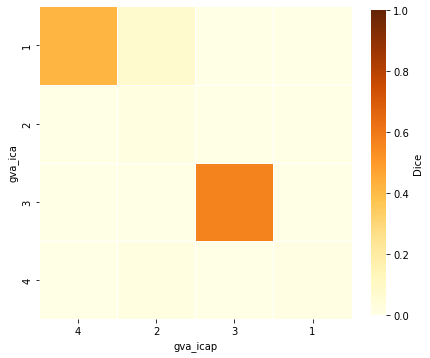

In [6]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_gva.spatial_similarity(k1=4,similarity_method='Dice')

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 40 vs gva_icap at K = 40 

The mean similarity is 0.54


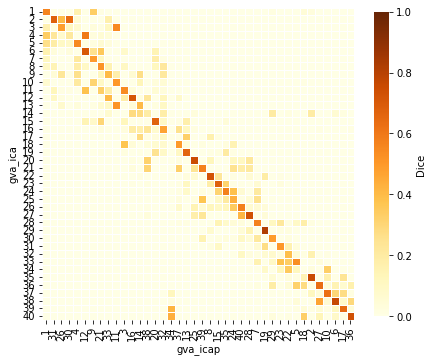

In [7]:
spine_analysis_gva.spatial_similarity(k1=40,similarity_method='Dice')

METHOD 2: Comparing two sets of components across K values


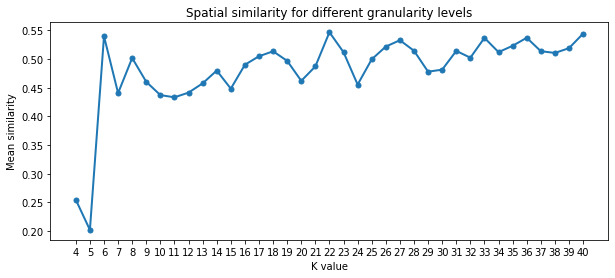

In [8]:
spine_analysis_gva.spatial_similarity(k_range=range(4,41),similarity_method='Dice', verbose=False)

### Investigate axial distribution for different Ks

#### Distributions seem a bit different: <font color=red> => TO EXPLORE </font>
- ICA: a lot of LR subdivisions early on
- iCAP: mostly DV </br>

COMPUTING AXIAL DISTRIBUTION 
 ––– Set: gva_ica 
 ––– Range: range(4, 41) 
 ––– Threshold: 2 
 ––– % for matching: 70
...Loading data for the different spinal masks
...Computing distribution for each K
DONE!


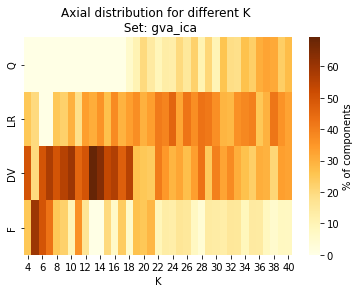

In [9]:
distribution_gva_ica = spine_analysis_gva.k_axial_distribution(spine_analysis_gva.name1, verbose=False)

COMPUTING AXIAL DISTRIBUTION 
 ––– Set: gva_icap 
 ––– Range: range(4, 41) 
 ––– Threshold: 2 
 ––– % for matching: 70
...Loading data for the different spinal masks
...Computing distribution for each K
DONE!


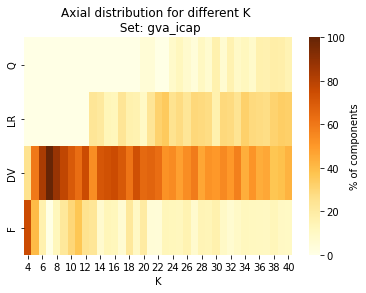

In [10]:
distribution_gva_icap = spine_analysis_gva.k_axial_distribution(spine_analysis_gva.name2, verbose=False)

### `MTL` dataset

### Instantiate class

In [11]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_mtl_1 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'ica'}
params_quant_mtl_2 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'icap'}

spine_analysis_mtl = SpineOnlyAnalysis(config,params1=params_quant_mtl_1,params2=params_quant_mtl_2)

### Analyze spatial similarity

#### Matching is a bit better for low K, and still good for high K!

METHOD 1: Comparing two sets of components at specific K values 
mtl_ica at K = 8 vs mtl_icap at K = 8 

The mean similarity is 0.52


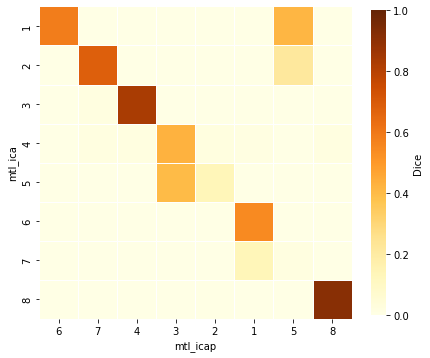

In [12]:
spine_analysis_mtl.spatial_similarity(k1=8,similarity_method='Dice')

METHOD 1: Comparing two sets of components at specific K values 
mtl_ica at K = 40 vs mtl_icap at K = 40 

The mean similarity is 0.54


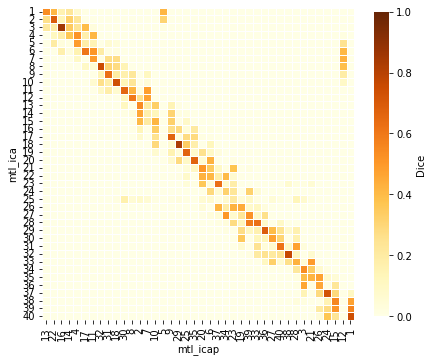

In [13]:
spine_analysis_mtl.spatial_similarity(k1=40,similarity_method='Dice')

### Investigate axial distribution for different Ks

#### Distributions seem a bit different: <font color=red> => TO EXPLORE </font>
- ICA: LR subdivisions early on
- iCAP: mostly DV </br>

_Note: here, no Q subdivisions... is it because we have more levels or because of the lower resolution?_

COMPUTING AXIAL DISTRIBUTION 
 ––– Set: mtl_ica 
 ––– Range: range(4, 41) 
 ––– Threshold: 2 
 ––– % for matching: 70
...Loading data for the different spinal masks
...Computing distribution for each K
DONE!


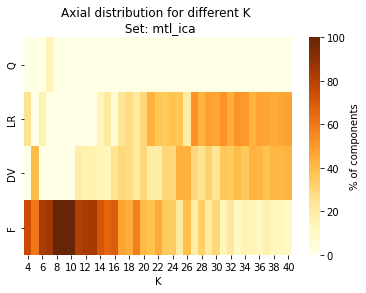

In [14]:
distribution_mtl_ica = spine_analysis_mtl.k_axial_distribution(spine_analysis_mtl.name1, verbose=False)

COMPUTING AXIAL DISTRIBUTION 
 ––– Set: mtl_icap 
 ––– Range: range(4, 41) 
 ––– Threshold: 2 
 ––– % for matching: 70
...Loading data for the different spinal masks
...Computing distribution for each K
DONE!


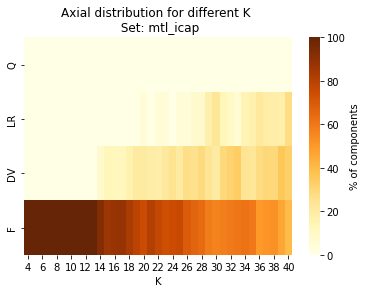

In [15]:
distribution_mtl_icap = spine_analysis_mtl.k_axial_distribution(spine_analysis_mtl.name2, verbose=False)

## Between-dataset comparison

### `ICA` method

### Instantiate class

In [16]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_ica_1 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'ica'}
params_quant_ica_2 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'ica'}

spine_analysis_ica = SpineOnlyAnalysis(config,params1=params_quant_ica_1,params2=params_quant_ica_2)

### Analyze spatial similarity

#### Very bad for low K, good for higher!
Note: here I have chosen $K \times 2$ for `mtl` compared to `gva`, to match the difference in spinal levels that are covered.

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 4 vs mtl_ica at K = 8 

The mean similarity is 0.03


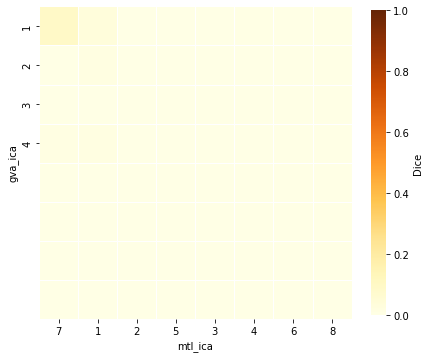

In [17]:
spine_analysis_ica.spatial_similarity(k1=4,k2=8,similarity_method='Dice')

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 20 vs mtl_ica at K = 40 

The mean similarity is 0.52


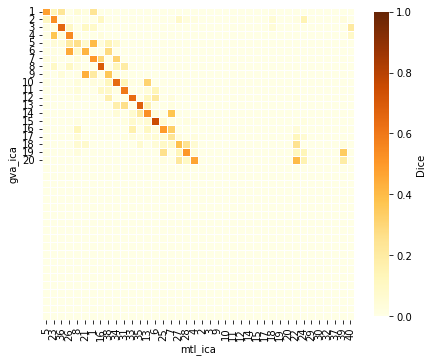

In [18]:
spine_analysis_ica.spatial_similarity(k1=20,k2=40,similarity_method='Dice')

### `iCAP` method

### Instantiate class

In [19]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_icap_1 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'icap'}
params_quant_icap_2 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'icap'}

spine_analysis_icap = SpineOnlyAnalysis(config,params1=params_quant_icap_1,params2=params_quant_icap_2)

### Analyze spatial similarity

#### Not great for low K, good for high K

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 4 vs mtl_icap at K = 8 

The mean similarity is 0.27


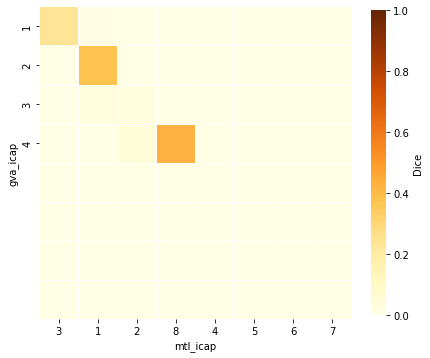

In [20]:
spine_analysis_icap.spatial_similarity(k1=4,k2=8,similarity_method='Dice')

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 20 vs mtl_icap at K = 40 

The mean similarity is 0.51


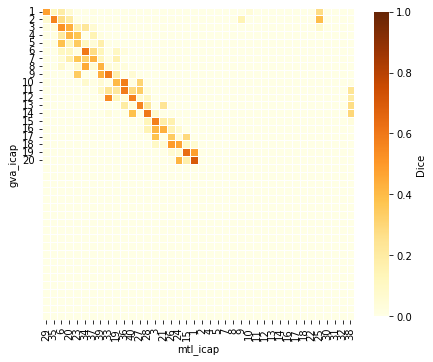

In [21]:
spine_analysis_icap.spatial_similarity(k1=20,k2=40,similarity_method='Dice')